<a href="https://colab.research.google.com/github/emersonrafaels/engines_ocr/blob/main/UTILS/1_UTILS_RESCALING_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Processing Techniques

# Importing libraries

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Global variables

In [4]:
path_img = "/content/IMAGES/1023-receipt.jpg"

In [6]:
width_target = 500

# Reading image

## Reading using OPENCV

In [5]:
img_bgr = cv2.imread(path_img)

## Visualize the image

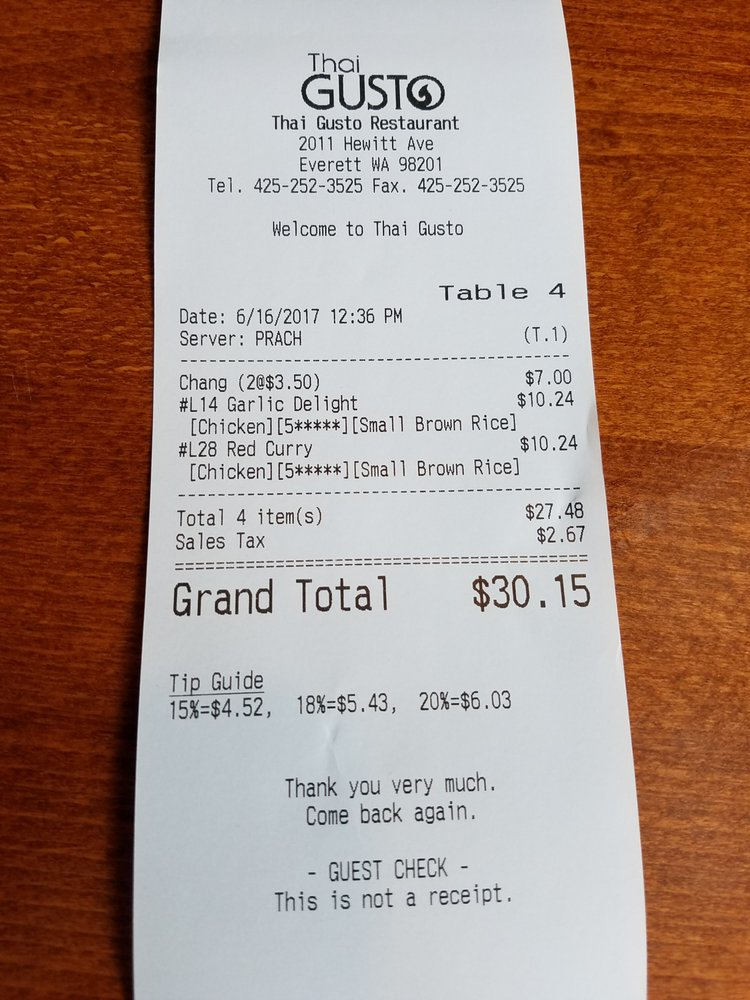

In [8]:
cv2_imshow(img_bgr)

## Getting the shape

In [22]:
def get_shape(value_shape):

  result_shape = {}

  if isinstance(value_shape, (tuple, list)):

    result_shape["width"] = img_bgr.shape[0]
    result_shape["heigth"] = img_bgr.shape[1]
    result_shape["dimensions"] = img_bgr.shape[2]

    print("{} DIMENSIONS".format(result_shape["dimensions"]))
    print("WIDTH: {}".format(result_shape["width"]))
    print("HEGHT: {}".format(result_shape["heigth"]))

  return result_shape

In [23]:
result_shape = get_shape(value_shape=img_bgr.shape)

3 DIMENSIONS
WIDTH: 1000
HEGHT: 750


# Rescaling the image using width

In [24]:
print("WIDTH TARGET: {}".format(width_target))

WIDTH TARGET: 500


In [25]:
r = width_target/result_shape["heigth"]
r

0.6666666666666666